####  Bethanie Williams
####  Data Mining and Machine Learning
####  Supervised Learning: Linear Regression
####  Date: 9/17/20

In [1]:
import pandas as pd
import numpy as np
import matplotlib   # import python libraries that I will need to use
import pylab
import sklearn
import scipy

In [2]:
from pandas import read_csv
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from scipy import optimize
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Step 1: Importing Data 

In [3]:
dataset = read_csv(r'C:\Users\betha\OneDrive\Documents\CSC 5220\Lab2_dataset.csv')  # importing csv
print(dataset)  # you will probably need to change the file directory

          X        y    Xtest     ytest     Xval       yval
0  -15.9368   2.1343 -33.3180   3.31690 -16.7465   4.170200
1  -29.1530   1.1733 -37.9122   5.39770 -14.5775   4.067300
2   36.1895  34.3591 -51.2069   0.13043  34.5158  31.873100
3   37.4922  36.8380  -6.1326   6.19260 -47.0101  10.623700
4  -48.0588   2.8090  21.2612  17.08850  36.9751  31.836000
5   -8.9415   2.1211 -40.3195   0.79951 -40.6861   4.959400
6   15.3078  14.7103 -14.5415   2.82480  -4.4720   4.451600
7  -34.7063   2.6142  32.5598  28.62120  26.5336  22.276300
8    1.3892   3.7402  13.3934  17.04640 -42.7977  -0.000044
9  -44.3838   3.7317  44.2099  55.38440  25.3741  20.503800
10   7.0135   7.6277  -1.1427   4.07940 -31.1096   3.858300
11  22.7627  22.7524 -12.7669   8.27040  27.3118  19.365100
12      NaN      NaN  34.0545  31.32360  -3.2639   4.883800
13      NaN      NaN  39.2235  39.15910  -1.8183  11.097200
14      NaN      NaN   1.9745   8.08730 -40.7197   7.461700
15      NaN      NaN  29.6218  24.11130 

In [4]:
print("Training Set: ")  # defining training set
x_training = dataset.iloc[:12, :1]  # gets rows until the 12th row and first two columns
y_training = dataset.iloc[:12, 1:2]
training_set = print(dataset[["X", "y"]])
print()

print("Test Set:")  # defining test set
x_testing = dataset.iloc[:, 2:3]  # gets all rows and next two columns
y_testing = dataset.iloc[:, 3:4]
testing_set =  print(dataset[["Xtest", "ytest"]])
print()

print("Validation Set:")  # defining validation set
x_validate = dataset.iloc[:, 4:5]  # gets all rows and last two columns
y_validate = dataset.iloc[:, 5:6]
validation_set =  print(dataset[["Xval", "yval"]])
print()

Training Set: 
          X        y
0  -15.9368   2.1343
1  -29.1530   1.1733
2   36.1895  34.3591
3   37.4922  36.8380
4  -48.0588   2.8090
5   -8.9415   2.1211
6   15.3078  14.7103
7  -34.7063   2.6142
8    1.3892   3.7402
9  -44.3838   3.7317
10   7.0135   7.6277
11  22.7627  22.7524
12      NaN      NaN
13      NaN      NaN
14      NaN      NaN
15      NaN      NaN
16      NaN      NaN
17      NaN      NaN
18      NaN      NaN
19      NaN      NaN
20      NaN      NaN

Test Set:
      Xtest     ytest
0  -33.3180   3.31690
1  -37.9122   5.39770
2  -51.2069   0.13043
3   -6.1326   6.19260
4   21.2612  17.08850
5  -40.3195   0.79951
6  -14.5415   2.82480
7   32.5598  28.62120
8   13.3934  17.04640
9   44.2099  55.38440
10  -1.1427   4.07940
11 -12.7669   8.27040
12  34.0545  31.32360
13  39.2235  39.15910
14   1.9745   8.08730
15  29.6218  24.11130
16 -23.6696   2.47740
17  -9.0118   6.56610
18 -55.9406   6.03810
19 -35.7086   4.69270
20   9.5102  10.83000

Validation Set:
       Xval

## Step 2: Defining train, test, and validation sets

In [5]:
# Turning data sets into arrays
x = np.array(x_training.values)  # array = dataset.values
x = x[np.logical_not(np.isnan(x))]  # remove nan values from my array
# print(x)
# print()

y = np.array(y_training.values)
y = y[np.logical_not(np.isnan(y))]  # remove nan values from my array
# print(y)
# print()

x_test = np.array(x_testing.values)
# print(x_test)
# print()

y_test = np.array(y_testing.values)
# print(y_test)
# print()

x_val = np.array(x_validate.values)
# print(x_val)
# print()

y_val = np.array(y_validate.values)
# print(y_val)
# print()

In [6]:
print("Training Data:") # print training data out to ensure correct values
print()

print(x)  # printing x training values
print()
print(y)  # printing y training values

Training Data:

[-15.9368 -29.153   36.1895  37.4922 -48.0588  -8.9415  15.3078 -34.7063
   1.3892 -44.3838   7.0135  22.7627]

[ 2.1343  1.1733 34.3591 36.838   2.809   2.1211 14.7103  2.6142  3.7402
  3.7317  7.6277 22.7524]


###############################################################################################################################

## Step 3: Plot Training Data

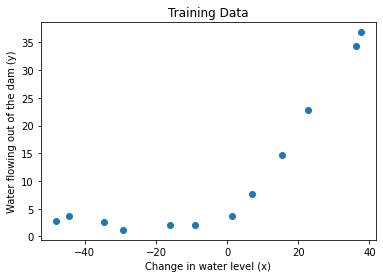

In [7]:
plt.title("Training Data")
x_train = dataset['X'].tolist()  # plotting training data
y_train = dataset['y'].tolist()
plt.scatter(x_train, y_train)  # scatter plot of data
plt.xlabel('Change in water level (x)')  # labels x-axis
plt.ylabel('Water flowing out of the dam (y)')  # labels y-axis
plt.show()  # displays scatter plot

###############################################################################################################################

## Step 4: Create Gradient Descent 

In [8]:
def gradient_descent(alpha, x, y, lamb=0, conv=0.0001, max_iter=10000): # input alpha=learning rate, x and = data,
    converged = False                                                   #  convergence thresh= 0.0001, max_iter = 10000
    iteration = 0 # set iteration counter to 0
    m = x.shape[0] # number of samples
    t_n = ([0.0,0.0])  # initial theta
    num_thetas = len(t_n) # length of theta array

    # total error, J(theta)
    J = sum([(t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum(t_n[i] ** 2 for i in range(num_thetas)))

    while not converged:# Iterate Loop until convergence has happened
        
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t_n[0] - alpha * grad0
        temp1 = ((1.0 -((alpha * lamb)/m)) * t_n[1]) - alpha * grad1
    
        # update theta
        t_n[0] = (temp0)
        t_n[1] = (temp1)

        # mean squared error
        e = sum([ (t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum([t_n[i]**2 for i in range(num_thetas)])) 
        
        if abs(J-e) <= conv: 
            print('Converged, iterations: ', iteration, '!!!')
            converged = True
    
        J = e   # update error 
        iteration += 1  # update iter
    
        if iteration == max_iter:
            print('Max interactions exceeded!')
            converged = True
            
        for i in range(num_thetas):
            y_predict = t_n[0] + t_n[1]*x
    
    print("Theta0 =", t_n[0], "Theta1 =", t_n[1]) # theta0 is y-intercept, theta1 is slope

    return t_n[0], t_n[1]  # returns theta0 and theta1

In [9]:
theta0, theta1= gradient_descent(0.001, x, y)
# print (theta0, theta1)

Converged, iterations:  5445 !!!
Theta0 = 13.021432891787487 Theta1 = 0.36738026698713894


################################################################################################################################

## Step 5: Plot J-Theta with respect to Iterations

In [10]:
def work_properly(alpha, x, y, lamb=0, conv=0.0001, max_iter=10000): # input alpha=learning rate, x and = data,
    converged = False                                                   #  convergence thresh= 0.0001, max_iter = 10000
    iteration = 0  # set iteration counter to 0
    m = x.shape[0] # number of samples
    t_n = ([0.0,0.0]) # initial theta
    num_thetas = len(t_n) # length of theta array

    # total error, J(theta)
    J = sum([(t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum(t_n[i] ** 2 for i in range(num_thetas)))

    while not converged: # Iterate Loop until convergence has happened
        
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t_n[0] - alpha * grad0
        temp1 = ((1.0 -((alpha * lamb)/m)) * t_n[1]) - alpha * grad1
    
        # update theta
        t_n[0] = (temp0)
        t_n[1] = (temp1)

        # mean squared error
        e = sum([ (t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum([t_n[i]**2 for i in range(num_thetas)])) 
        
        if abs(J-e) <= conv:
            converged = True
    
        J = e   # update error 
        iteration += 1  # update iter
    
        if iteration == max_iter:
            print('Max interactions exceeded!')
            converged = True
        
        for i in range(num_thetas):
            y_predict = t_n[0] + t_n[1]*x

            plt.plot(iteration, J, 'o')
            plt.xlabel('Iterations')  # labels x-axis
            plt.ylabel('J theta')  # labels y-axis


    return J, iteration-1

Jtheta and Number of Iterations:
(537.024955872586, 5445)


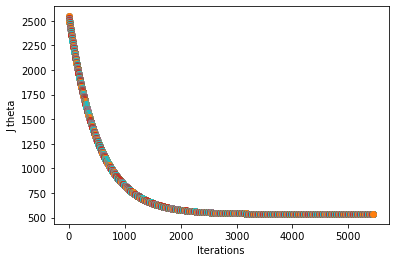

In [11]:
print("Jtheta and Number of Iterations:")
results= work_properly(0.001, x, y)
print (results)

################################################################################################################################

## Step 6: Create Linear Regression

In [12]:
 def linear_regression_prediction(t0, t1, x):
    regression = t0  # linear regression thet0 + theta1 * x
    regression += t1*x
    return regression

test_predicted_values = []  # make empty array for predicted values

for i in np.nditer(x_test):  # use test data in linear regression 
    test_predicted_value = linear_regression_prediction(theta0, theta1, i)
    test_predicted_values.append(test_predicted_value)
print(test_predicted_values)  # will use these predicted values for the MSE

[0.7810571563099895, -0.9067612662823201, -5.790971701796238, 10.76843666646216, 20.832378224254445, -1.7911557830004607, 7.679172739394007, 24.983260908835334, 17.941903759653034, 29.263277757262202, 12.601627460701284, 8.331125761189384, 25.53238419390101, 27.431372793957532, 13.746825228953593, 23.903897684427122, 4.325688924308704, 9.71067540175279, -7.530039671633258, -0.09720210994946044, 16.515292706888577]


In [13]:
# regression_prediction(theta0, theta1, x_test)

################################################################################################################################

## Step 7: Create MSE calculation

In [14]:
def evaluate_MSE(pred, ytest, m):  # for MSE we use the predicted y values and test data
    MSE = (1/(m))*sum([(pred[i]-ytest[i])**2 for i in range(m)])
    return MSE

train = x.shape[0]    # the length of all our sets of data
test = x_test.shape[0]
validate = x_val.shape[0]

In [15]:
print("MSE:")
evaluate_MSE(test_predicted_values, y_test, test)

MSE:


array([65.29849453])

################################################################################################################################

## Step 8: Plot Linear Regression 

In [16]:
def plot_test():
    x_2d = np.reshape(x, (-1,1))  # need to reshape arrays for two dimensions
    x_2d_test = np.reshape(x_test, (-1,1))
    skit = linear_model.LinearRegression()  # using skit learn
    skit.fit(x_2d, y)   # fitting data
    y_test_predict = skit.predict(x_2d_test) # predicting y test value

    plt.scatter(x_2d, y, c= "blue", label = "original data")
    plt.plot(x_test, test_predicted_values, label = "my linear version")
    plt.plot(x_test, y_test_predict, linestyle = ":", c= "orange", label = "skit version")
    plt.xlabel('x')  # labels x-axis
    plt.ylabel('y')  # labels y-axis
    plt.legend(loc = "best")  # puts legend in best location
    plt.show()

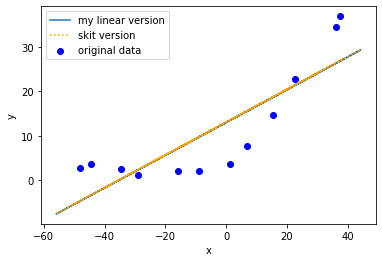

In [17]:
plot_test()  # my model overlaps with skit version

In [18]:
################################################################################################################################

## Step 9: Plot Learning Curves

In [19]:
def learning_curves(x, y, x_val, y_val, size = 12):
    validation_error = []
    training_error = []  # create empty arrays for errors of both validation and training data
    

    for i in range(1,13):
        theta0, theta1 = gradient_descent(0.001, x[0:i], y[0:i])  # call gradient descent 
        validation_predictions = regression_prediction(theta0, theta1, x_val)  # call regression function for both validation 
        training_predictions = regression_prediction(theta0, theta1, x[0:i])  # and training
        MSE_validation = evaluate_MSE(validation_predictions, y_val, len(y_val))  # call MSE to evaluate training and validation
        MSE_train = evaluate_MSE(training_predictions, y[0:i], i)
        validation_error.append(MSE_validation)  # put MSE error into the empty error we had
        training_error.append(MSE_train)

    
    plt.title("Learning Curves")
    plt.xlabel('Number of Training Examples')  # labels x-axis
    plt.ylabel('Error')  # labels y-axis 
    plt.plot(range(len(x)), validation_error, c= "blue", label="validation")
    plt.plot(range(len(x)), training_error, c="r", label= "training")
    plt.legend(loc = "best") # puts legend in best location
    plt.show()


In [20]:
learning_curves(x, y, x_val, y_val)

Converged, iterations:  17 !!!
Theta0 = 0.008328552579825068 Theta1 = -0.13273047675415606


NameError: name 'regression_prediction' is not defined

###############################################################################################################################

## Step 10: Create Normalization Function

In [ ]:
def normalization_func(x):  # reference to slide 14
    normalized_array = []   # empty normalization array
    for i in x:
        normalize= (i-np.min(x))/(np.max(x)-np.min(x))  # normalization equation 
        normalized_array.append(normalize)
    return normalized_array

In [ ]:
normalization_func(x)

###############################################################################################################################